In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> #Here we remove the customerId feature because it is not important for our dataset  

In [4]:
df.drop(columns=["customerID"],inplace=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Automated eda using **** Panadas profiling 

In [5]:
!pip install ydata-profiling

In [6]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title="Customer Churn Prediction",explorative=True)
profile.to_file("churn_eda.html")    # save report as html

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 36.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile

In [8]:
df.isnull().sum

<bound method DataFrame.sum of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False         False   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False         False   
7041   False          False    False       False   False         False   
7042   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0         

# Manual Eda by using Seaborn and matplotib 

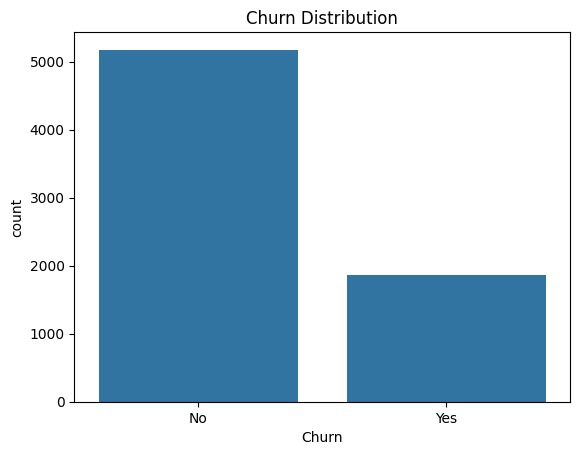

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

In [10]:
churn_percent = df["Churn"].value_counts(normalize=True) * 100
churn_percent
#churn percenatge 


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

The majority of customers are retained, but a significant proportion churn, indicating a need for better retention strategies.

tenure vs churn 

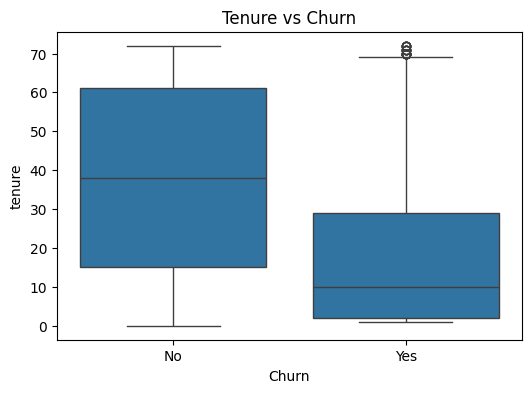

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


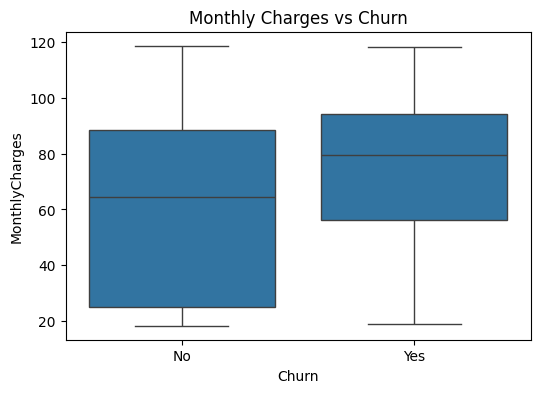

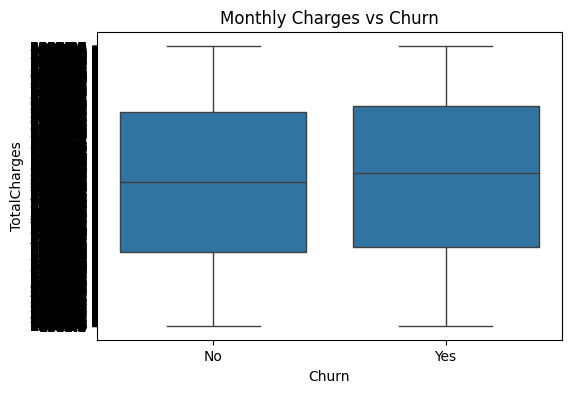

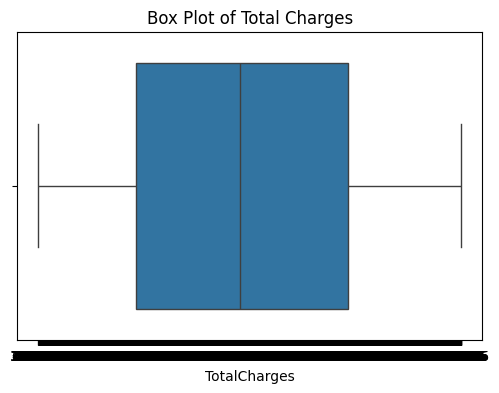

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()  
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show() 

plt.figure(figsize=(6,4))
sns.boxplot(x=df["TotalCharges"])
plt.title("Box Plot of Total Charges")
plt.show()



# ****Customers with higher monthly charges show a higher tendency to churn, possibly due to price sensitivity.****

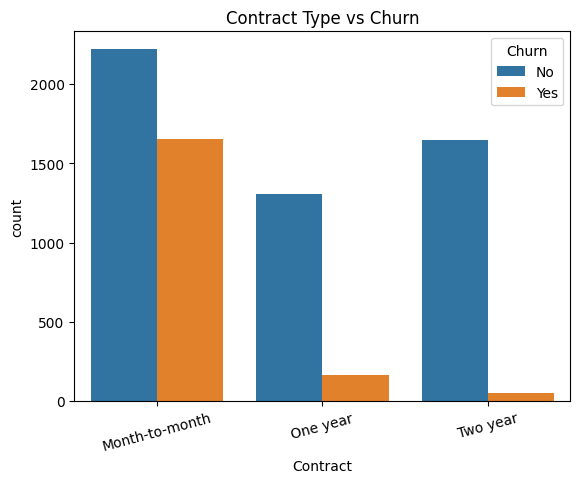

In [13]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()


> Month-to-month contracts have the highest churn rate, while long-term contracts show better retention.

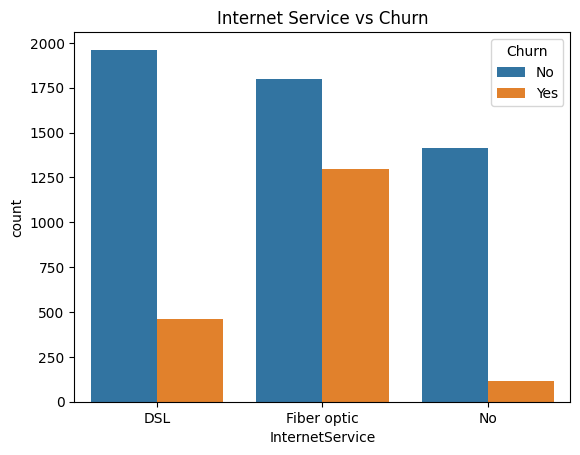

In [14]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()


> Fiber optic users show higher churn

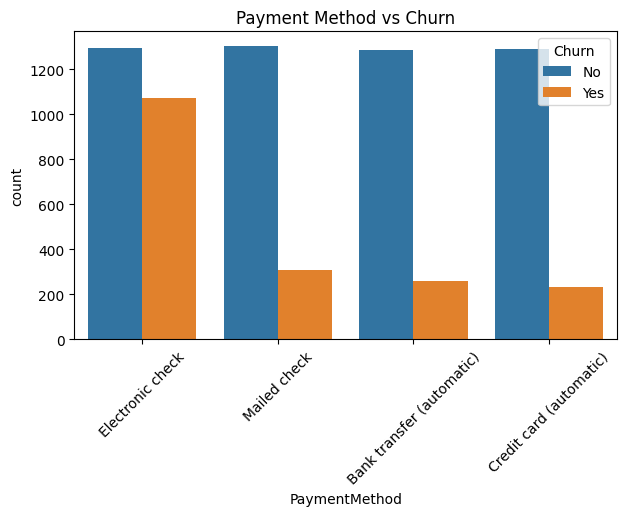

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


Customers using electronic check payment methods exhibit higher churn compared to other payment types.

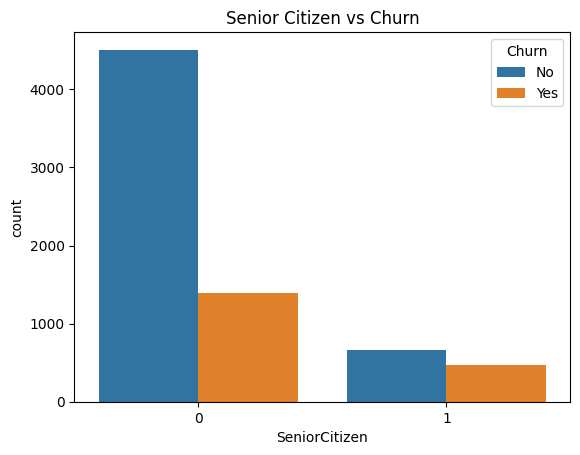

In [16]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Senior Citizen vs Churn")
plt.show()
 




# Feature engineering 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df["TotalCharges"].isnull().sum()


np.int64(0)

In [20]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype
median_total_charges = df["TotalCharges"].median()
median_total_charges
df["TotalCharges"].fillna(median_total_charges, inplace=True)
df["TotalCharges"].isnull().sum()



/tmp/ipykernel_18/931804470.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(median_total_charges, inplace=True)


np.int64(0)

*apply one hot encoding on the column which has data type as object*
*label encoder on the output data churn*

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [22]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

X = df.drop("Churn", axis=1)
y = df["Churn"]

In [23]:
# Categorical (object) columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Numerical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
) 
X_transformed = preprocessor.fit_transform(X)
type(X_transformed) 




numpy.ndarray

In [25]:
# Get encoded feature names
encoded_cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols)

# Combine all feature names
all_features = list(encoded_cat_features) + list(numerical_cols)

# Convert to DataFrame (for readability)
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)

X_transformed_df.head()
X_transformed_df.isnull().sum().sum()




np.int64(0)

# Now we will train our model into this dataset by using Logisticc regression 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
) 
t
# Check missing values in X_train
X_train.isnull().sum().sum()
#X_train.columns[X_train.isnull().any()]






NameError: name 't' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred.shape







confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")



In [ ]:
import pandas as pd

coef_df = pd.Series(
    log_reg.coef_[0],
    index=X_transformed_df.columns
)

top_10_positive = coef_df.sort_values(ascending=False).head(10)
print("Top 10 features increasing churn:")
print(top_10_positive)


Coefficients show association, not causation

In [ ]:
top_10_negative = coef_df.sort_values().head(10)
print("\nTop 10 features decreasing churn:")
print(top_10_negative)


# Final conclusion
 Customer churn is strongly influenced by contract type, tenure, and monthly charges.Customers with month-to-month contracts, high monthly bills, and shorter tenure exhibit higher churn risk. Long-term contracts and value-added services significantly improve customer retention.
# Buisness recommendations 
Promote long-term contracts with discounts.
Offer early retention incentives for new customers.
Provide special offers to high-bill customers.
Improve onboarding and support services.


